In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"database/height-weight.csv")

In [3]:
dataset.shape

(30, 2)

In [4]:
dataset.sample(5)

,Weight,Height
29,76,176
14,85,185
11,66,169
12,57,161
27,54,159


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  30 non-null     int64
 1   Height  30 non-null     int64
dtypes: int64(2)
memory usage: 612.0 bytes


In [6]:
dataset.describe()

,Weight,Height
count,30.000000,30.000000
mean,66.966667,169.466667
std,9.400966,7.903440
min,52.000000,157.000000
25%,59.250000,162.250000
50%,66.500000,169.500000
75%,74.750000,176.000000
max,85.000000,185.000000


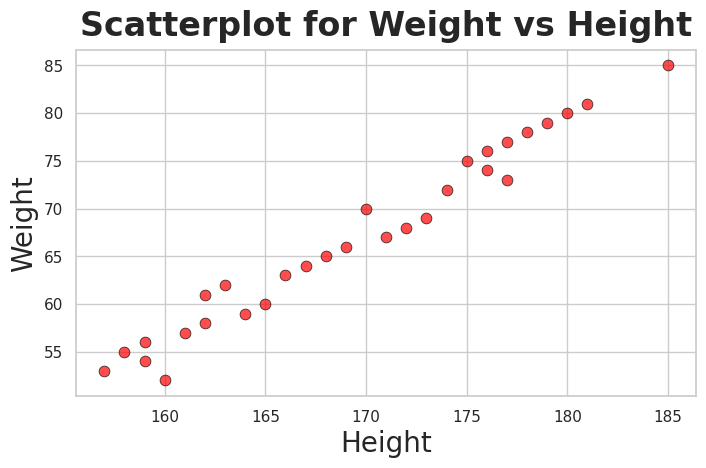

In [7]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4.5))
sns.scatterplot(x="Height", 
                y="Weight", 
                data=dataset, 
                s=60, 
                color="red", 
                edgecolor="black", 
                alpha=0.7)
plt.title("Scatterplot for Weight vs Height", 
          fontsize="24", 
          fontweight="bold", 
          pad=10)
plt.xlabel("Height", 
           fontsize="20")
plt.ylabel("Weight", 
           fontsize="20")
plt.show()

In [8]:
# creating classification based on height (>= 170cm)
# 1 - tall 
# 0 - short
dataset["Class"] = [1 if height >= 170 
                    else 0 
                    for height in dataset["Height"]]

In [9]:
x = dataset["Weight"].to_numpy()
y = dataset["Class"].to_numpy()

In [10]:
def findTotal(data):
    total = 0

    for value in data:
        total += value
        
    return total

In [11]:
def mean(data):
    length = len(data)
    total = findTotal(data)
    
    return total / length

In [12]:
def std(data):
    x_mean = mean(x)

    squared_diff = [(x - x_mean) ** 2 for x in data]
    variance = findTotal(squared_diff) / len(data)
    
    std = variance ** 0.5

    return std

In [13]:
x_mean = mean(x)
x_std = std(x)

In [14]:
x_scaled = (x - x_mean) / x_std

In [15]:
def exp(n):
    return np.e ** n

In [16]:
def sigmoid(n):
    return 1 / (1 + exp(-n))

In [17]:
def cost_function(theta0, theta1, x, y):
    l = len(y)

    z = theta1 * x + theta0
    pred = sigmoid(z)

    cost = -findTotal(y * np.log(pred + 1e-15) 
                      + (1 - y) * np.log(1 - pred + 1e-15)) / l
    return cost

In [18]:
def gradient_descent_convergence(x, y, alpha=0.1, max_iters=100000, epsilon=1e-6):
    theta0, theta1 = 0, 0
    cost_history = []
    prev_cost = float('inf')
    l = len(y)

    for i in range(max_iters):
        z = theta1 * x + theta0
        pred = sigmoid(z)

        dt0 = findTotal(pred - y) / l
        dt1 = findTotal((pred - y)* x) / l

        theta0 -= alpha * dt0
        theta1 -= alpha * dt1

        cost = cost_function(theta0, theta1, x, y)
        cost_history.append(cost)

        if abs(prev_cost - cost) < epsilon:
            print(f"Converged at iteration: {i}")
            break

        prev_cost = cost
    
    return theta0, theta1, cost_history 

In [19]:
theta0, theta1, cost_history = gradient_descent_convergence(x_scaled, y)

Converged at iteration: 14231


In [20]:
print(f"Optimal Parameters:")
print(f"Intercept: {theta0}")
print(f"Slope: {theta1}")

Optimal Parameters:
Intercept: 0.6416720778239933
Slope: 12.897800932071956


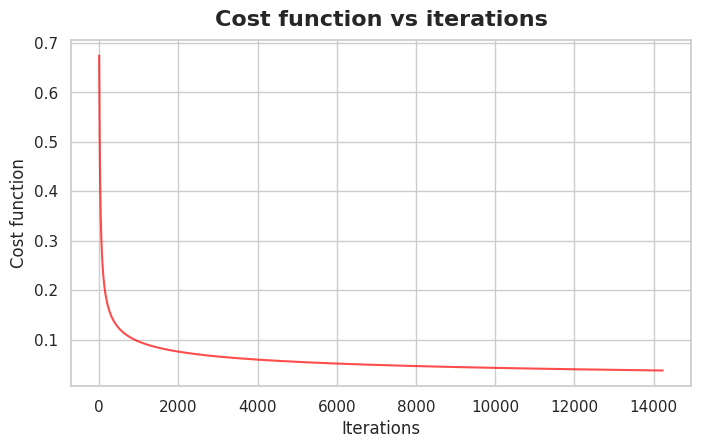

In [21]:
plt.figure(figsize=(8, 4.5))
sns.lineplot(x=range(len(cost_history)), y=cost_history, color="red", alpha=0.7)
plt.title("Cost function vs iterations", fontsize="16", fontweight="bold", pad=10)
plt.xlabel("Iterations", fontsize="12")
plt.ylabel("Cost function", fontsize="12")
plt.show()

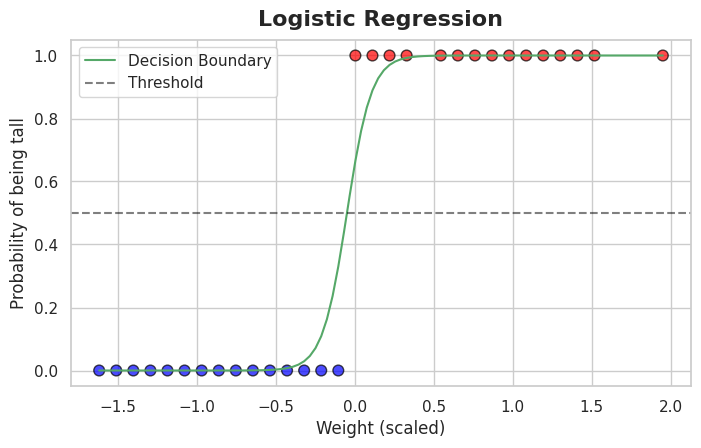

In [22]:
plt.figure(figsize=(8, 4.5))
plt.scatter(x_scaled, y, c=y, cmap='bwr', s=60, edgecolor="black", alpha=0.7)
x_line = np.linspace(x_scaled.min(), x_scaled.max(), 100)
y_line = sigmoid(theta1 * x_line + theta0)
plt.plot(x_line, y_line, 'g-', label='Decision Boundary')
plt.axhline(0.5, color='black', linestyle='--', alpha=0.5, label='Threshold')
plt.title("Logistic Regression", fontsize="16", fontweight="bold", pad=10)
plt.xlabel("Weight (scaled)", fontsize="12")
plt.ylabel("Probability of being tall", fontsize="12")
plt.legend()
plt.show()